# Latar Belakang

Airbnb adalah sebuah aplikasi online yang memungkinkan user untuk mendaftarkan atau menyewa suatu properti. Namun tidak semua properti pada Airbnb memiliki tingkat ke populeran yang sama. Beberapa properti memiliki jumlah review yang sangat banyak dan beberapa properti tidak memiliki review sama sekali.

## Pernyataan Masalah

Pihak Airbnb ingin mengetahui **listing mana saja yang sedang banyak diminati dalam 12 bulan terakhir**. Dengan informasi ini, Airbnb akan lebih mudah membedakan mana properti yang sedang populer dan mana yang tidak. 

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

**Bagaimana karakteristik listing yang mempunyai jumlah review diatas rata-rata dalam 12 bulan terakhir?**

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data properti yang sudah dikumpulkan oleh pihak Airbnb. 

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind


## Load Dataset

In [99]:
df=pd.read_csv('Airbnb Listings Bangkok.csv', index_col=0)
display(df.head(),df.tail())

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


## Data Understanding

Dataset ini berisi informasi dari setiap listing yang disewakan. Dataset ini mempunyai 16 kolom, yaitu:

- `id` : ID unik untuk setiap listing
- `name` : Deskripsi nama dari setiap listing
- `host_id` : ID unik untuk setiap host
- `host_name` : Nama dari setiap host (nama depan)
- `neighbourhood` : Nama distrik
- `latitude` : Titik latitude pada peta
- `longitude` : Titik longitude pada peta
- `room_type` : Tipe ruangan setiap listing (Entire home/apt, Private room, Shared room, Hotel room)
- `price` : Harga sewa untuk permalam-nya
- `minimum_nights` : Jumlah minimum malam untuk setiap listing
- `number_of_reviews` : Banyaknya review yang dimiliki tiap listing
- `last_review` : Tanggal dari review terakhir/terbaru
- `calculated_host_listings_count` : Jumlah listing yang dimiliki oleh host
- `availability_365` : Ketersediaan listing dalam 1 tahun kedepan
- `number_of_reviews_ltm` : Banyaknya review yang dimiliki tiap listing dalam 12 bulan terakhir

## Exploratory Data Analysis
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita pilih kolom-kolom yang akan dipakai untuk analisis.

- Kolom `id`, `name`, dan `host_id` digunakan sebagai identitas dari tiap listing
- Kolom `latitude` dan `longitude` digunakan sebagai informasi letak dari tiap listing
- Kolom `room_type`, `price`, dan `neighbourhood` adalah kolom yang akan kita gunakan untuk analisis
- Kolom `number_of_reviews_ltm` sebagai acuan utama untuk analisis kita

Kita tidak akan menggunakan kolom-kolom review yang lainnya karena analisis kita disini hanya berfokus pada data 12 bulan terakhir saja, sehingga kita hanya akan menggunakan kolom `number_of_reviews_ltm`.

In [100]:
df= df[['id','name', 'host_id', 'latitude', 'longitude', 'room_type', 'price', 'neighbourhood', 'number_of_reviews_ltm']]
df.head()

,id,name,host_id,latitude,longitude,room_type,price,neighbourhood,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,13.75983,100.54134,Entire home/apt,1905,Ratchathewi,0
1,27979,"Easy going landlord,easy place",120541,13.66818,100.61674,Private room,1316,Bang Na,0
2,28745,modern-style apartment in Bangkok,123784,13.75232,100.62402,Private room,800,Bang Kapi,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,13.78823,100.57256,Private room,1286,Din Daeng,1
4,941865,Suite Room 3 at MetroPoint,610315,13.76872,100.63338,Private room,1905,Bang Kapi,0


Untuk mempermudah analisis, kita akan mengganti nama dari beberapa kolom:
- `id` menjadi `listing_id`
- `name` menjadi `listing_name`
- `number_of_reviews_ltm` menjadi `total_reviews`

In [101]:
df = df.rename(columns={'id' : 'listing_id',
                        'name' : 'listing_name',
                        'number_of_reviews_ltm' : 'total_reviews'})

In [102]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}\n')
df.info()

Jumlah baris dan kolom di dataset df adalah (15854, 9)

<class 'pandas.core.frame.DataFrame'>
Index: 15854 entries, 0 to 15853
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   listing_id     15854 non-null  int64  
 1   listing_name   15846 non-null  object 
 2   host_id        15854 non-null  int64  
 3   latitude       15854 non-null  float64
 4   longitude      15854 non-null  float64
 5   room_type      15854 non-null  object 
 6   price          15854 non-null  int64  
 7   neighbourhood  15854 non-null  object 
 8   total_reviews  15854 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


### Descriptive Statistics

In [103]:
display(df.describe(), df.describe(include='object'))

,listing_id,host_id,latitude,longitude,price,total_reviews
count,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000
mean,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,3.481519
std,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,8.916937
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,0.000000
50%,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,0.000000
75%,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,325.000000


,listing_name,room_type,neighbourhood
count,15846,15854,15854
unique,14794,4,50
top,New! La Chada Night Market studio 2PPL near MRT,Entire home/apt,Vadhana
freq,45,8912,2153


### Missing Values

In [104]:
df.isna().sum()

listing_id       0
listing_name     8
host_id          0
latitude         0
longitude        0
room_type        0
price            0
neighbourhood    0
total_reviews    0
dtype: int64

### Duplicated Data

In [105]:
df.duplicated().sum()

0

### Unique Values

In [106]:
pd.set_option('display.max_colwidth', None)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,listing_id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, 48736, 1738669, 1744248, 952677, 55681, 1765918, 55686, 59221, 959254, 62217, 1791481, 66046, 105042, 1793000, 960858, 113744, 965722, 1808600, 118118, 1816517, 969792, 121410, 145343, 973830, 156583, 1823321, 159854, 976690, 978531, 166267, 169285, 978969, 1842066, 169514, 1849029, 1862089, 985743, 988373, 172332, 1016487, 1862331, 1862377, 185364, 1887544, 1888303, 1019241, 241416, 1026451, 1028469, 1028486, 1035589, 1035640, 1897982, 296960, 1898332, 1041976, 313459, 1052180, 1926489, 320014, 1933894, 1057173, 1060320, 384924, 1067748, 1077493, 1943048, 385130, 385278, 385979, 390611, 1947314, 1079039, 1086843, 393066, 397449, 405662, 1088343, 1094136, 1961981, 407381, 1975849, 1133843, 413824, 428360, 428421, 428907, 428950, 430691, 430703, 430706, 432004, 439051, 1138679, ...]"
1,listing_name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint, NEw Pro!! Bungalow Bkk Centre, Condo with Chaopraya River View, 1 chic bedroom apartment in BKK, Batcave, Pool view, near Chatuchak, Standard Room Decor do Hostel, Sathorn Terrace Apartment(61), 2BR apt in a cozy neighborhood, Comfy bedroom near River pier & BTS Taksin., budget hotel bangkok near subway, Deluxe Condo, Nana, Pool/GYM/Sauna, Luxury@swimpool/FreeWiFi/nearJJMkt, Nice and Quiet condo near BTS Onnut, 24Flr- 1br Apt near JJ, MRT, BTS, Central Bangkok 3 Bedroom Apartment, The Duplex - Asoke- Luxury 92sqm, New, Stylish & Luxury Studio Condo, River View - Ivy Condo (1 Bedroom), Siamese Gioia on Sukhumvit 31, Contemporary Modern Duplex-Thong Lo, Pan Dao Condo 5 min from BTS On Nut, 1 BR condominium center BKK +NETFLIX+55SQM, 1 penthouse in central Bangkok, MetroPoint Suite Room, Near Airport, Boutique Rooms Near Bangkok Airport, BangLuang House1 @ Bangkok Thailand, Studio near Chula University/Silom walk to MRT/BTS, กรองทองแมนชั่น (ลาดพร้าว 81), Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7, Beautiful 1 BR apartment @BTS Ari, Urban Oasis in the heart of Bangkok, 1Bed apt. near Chula University/Silom, Stay at the ROARING RATCHADA!, 60 m2 apartment in Thong Lor, Bangkok, ICONSIAM River view on 49th floor, 2br apt in Sukhumvit Asoke near BTS, Self catering cozy1-bed near BTS, ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀, Room with city view of BKK, BangLuang House 2@ Bangkok Thailand, Tranquility found in busy Bangkok near new skytran, Private room in Bangkok, ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs✪✪✪✪, ☞Downtown Central Studio-Bangkok MRT, Beautiful Wood Bangkok Resort House, ""Serviced 2 Bed Scenic SkyVillas"", Cozy 1BR rooftop (BTS Ploenchit) heart of bangkok, Chic two bedroom for Monthly rental, Sukhumvit52 near SkyTrain to BkkCBD, ♡Chic Studio, Easy Walk to Pier & BTS Taksin♡, One Bedroom Suite- WIFI- SATHORN, STUDIO RM2 - WIFI- SATHORN, Quiet Double Bed Apartment, Quiet Double Bed Apartment, Suvarnabhumi free transfer, Luxury&Comfy wthWifi walk-distance to Subwy-Malls, Apr. for rent full fur 1 bedroom, monthly, Long-stay special rate spacious entire floor Siam, One Bed Room at Sukumvit 50 Bangkok, City View, relaxed theme & delicious food around, Ideo Blucove Sukhumvit Bangkok, 2-BR condo near BTS on Sukhumvit Rd, NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airport., IdeoMix, Sukhumvit RD, close to BTS, Mix Dorm Decor do Hostel, Oasis in the heart of Bangkok, 5 mins by car from Chong Nonsi BTS Station, Inn Saladaeng - Superior hotel room, Best nr Chatujak, MRT, BTS free wifi&fNetflix, ❂Citycenter✔Subway station✔Private Bathroom4Aircon, Nice River View Condominium 30 sq.m, Monthly rent 2Beds/2Baths quiet APT at BTS, Sukhumvit apartment near Nana BTS, A room w/ the view :-) in the city, Spacious 1Bed apartment, Near Bangkok more space than urban!, ✺✺99 feet in the sky✺✺, Cozy Studio Apt near Skytrain.(72/74), Asoke: tasteful, moder

### Data Distribution

#### Numerical Features

In [107]:
numerical_col = ['price','total_reviews']

c:\Users\azkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\azkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\azkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


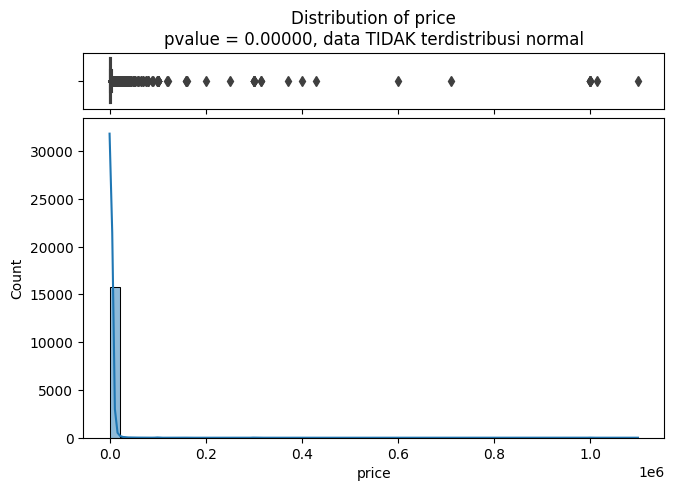

c:\Users\azkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\azkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\azkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


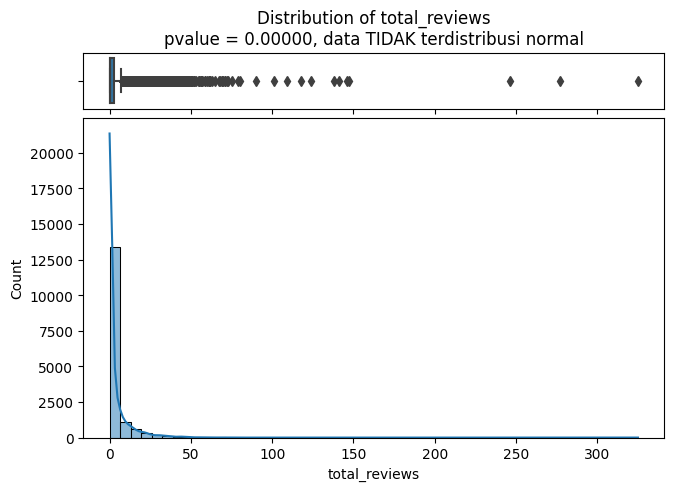

In [108]:
for kolom in numerical_col:

    fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (7.5,5), 
                                    gridspec_kw={"height_ratios": (.15, .85),
                                                "hspace": 0.05})

    stat, pvalue = normaltest(df[kolom].dropna())

    if pvalue > 0.05 :
        distribusi = f'pvalue = {pvalue:.5f}, data terdistribusi normal'
    else :
        distribusi = f'pvalue = {pvalue:.5f}, data TIDAK terdistribusi normal'

    ax1.set_title(f"Distribution of {kolom}\n{distribusi}", color = "black")
    sns.boxplot(x = df[kolom], ax = ax1)
    ax1.set(xlabel = "")

    sns.histplot(data = df[kolom], ax = ax2, kde=True, bins=50)

    plt.show()

#### Categorical Features

In [109]:
categorical_col = ['room_type', 'neighbourhood']

c:\Users\azkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\azkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\azkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\azkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

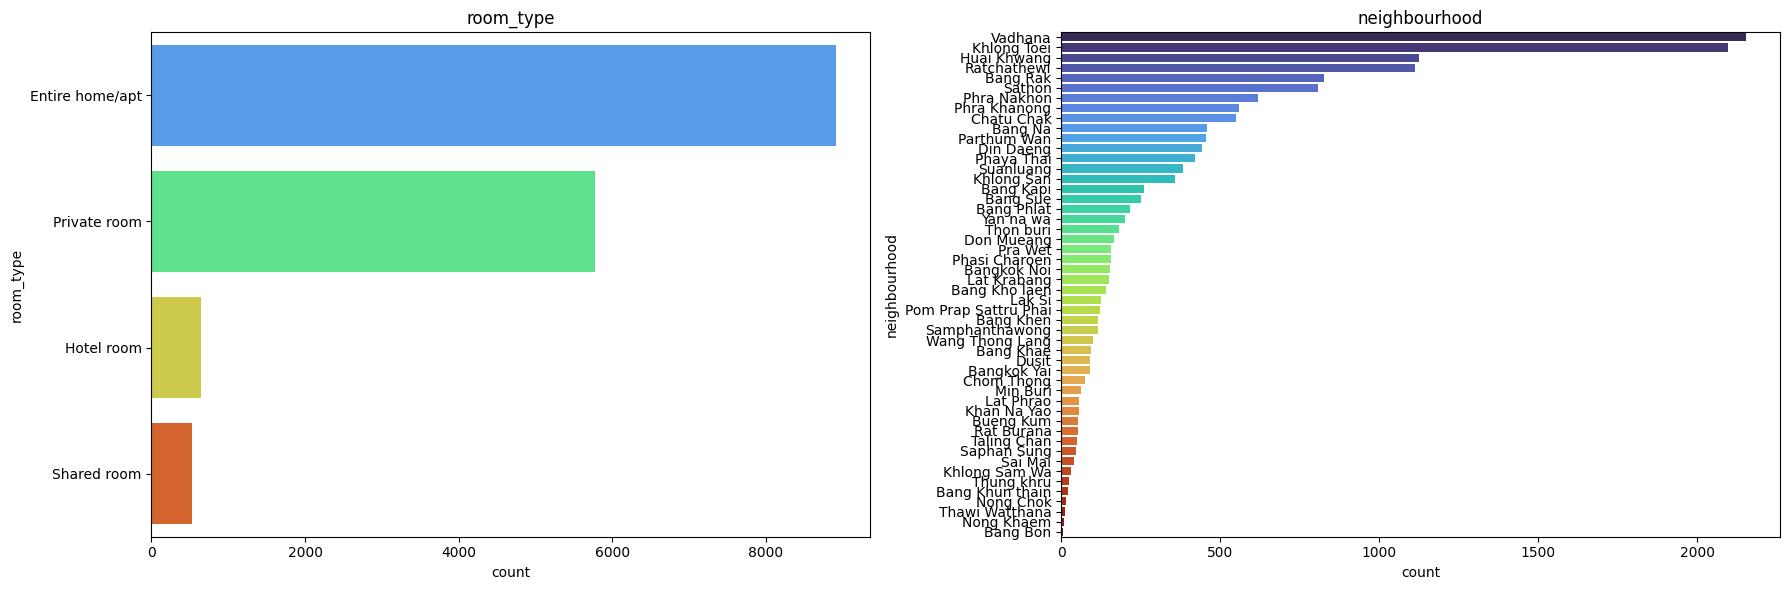

In [110]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6)) 
for i, j in zip(categorical_col, axes.flatten()):
    ax = sns.countplot(data=df, y= i, ax= j, order=df[i].value_counts().index, palette= 'turbo')
    ax.set_title(f'{i}',size = 12) 
plt.tight_layout()

plt.show()

## Data Preprocessing

### Drop Duplicates

- Tidak ada data duplikat

### Handling Outliers

#### 1. Kolom `price`

In [111]:
df[['price']].describe()

,price
count,1.585400e+04
mean,3.217704e+03
std,2.497212e+04
min,0.000000e+00
25%,9.000000e+02
50%,1.429000e+03
75%,2.429000e+03
max,1.100000e+06


c:\Users\azkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


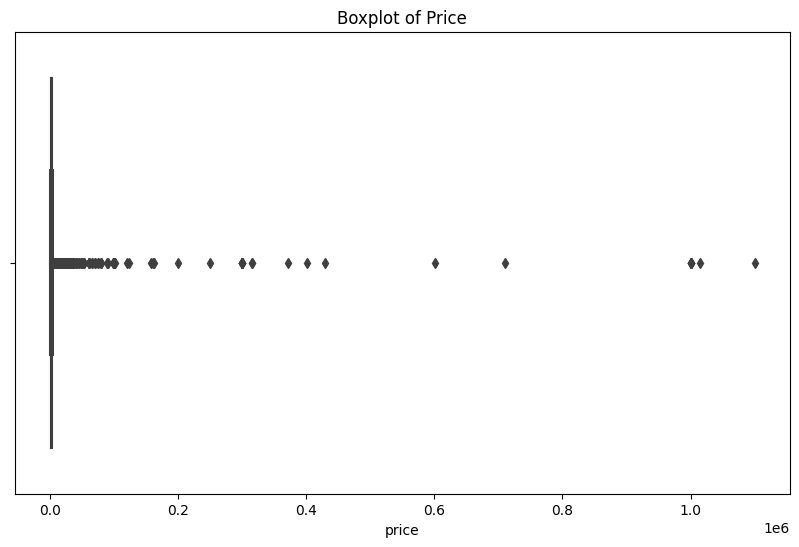

In [112]:
plt.figure(figsize = (10, 6))
plt.title('Boxplot of Price')
sns.boxplot(data = df,x='price')
plt.show()

- Terdapat banyak outlier pada kolom ini. Mari kita cek outlier-outlier tersebut

In [113]:
df.sort_values('price', ascending=False).head()

,listing_id,listing_name,host_id,latitude,longitude,room_type,price,neighbourhood,total_reviews
12868,635676064543597376,New 1 bedroom apartment BTS MRT Asoke,12464705,13.742186,100.560394,Entire home/apt,1100000,Vadhana,0
12300,562972065309061724,3B中文No Guest Service Fee@Nana Asok/Soi11 Nightlife,131427125,13.746660,100.559100,Entire home/apt,1014758,Vadhana,2
4620,23740993,"Modern&Luxury apartment,5min to MRT,freeWifi",30803267,13.760650,100.568980,Entire home/apt,1000000,Huai Khwang,0
6289,29909847,BTS轻轨线on nut站，全新一房一厅，临Tesco商场市集!New cozy 1BR,210559448,13.703330,100.592470,Entire home/apt,1000000,Khlong Toei,0
1239,8880974,"Modern,wifi,5m MRT&2 Shopping Mall",30803267,13.759950,100.569360,Entire home/apt,1000000,Huai Khwang,0


Terdapat satu listing dengan price 1014758 bath yang mempunyai jumlah review 2. Hal ini menunjukkan bahwa harga dari listing-listing diatas masih wajar, mungkin harga tersebut sebanding dengan fasilitas yang ditawarkan oleh listing tersebut. Jadi kita tidak usah menghapus outlier-outlier ini.

- Adanya listing yang mempunyai nilai price 0

In [114]:
df[df['price']==0]

,listing_id,listing_name,host_id,latitude,longitude,room_type,price,neighbourhood,total_reviews
11103,44563108,Somerset Maison Asoke Bangkok,360620448,13.73815,100.5642,Hotel room,0,Vadhana,0


Berdasarkan domain knowledge, tidaklah mungkin suatu properti disewakan dengan gratis. Hal ini sangatlah tidak wajar. Maka kita akan mengisi data price ini dengan median dari data price yang mempunyai room type Hotel room dan berada di daerah Vadhana.

In [115]:
df.loc[11103, 'price'] = df[(df['room_type'] == 'Hotel room') & (df['neighbourhood'] == 'Vadhana')]['price'].median()

In [116]:
df.loc[[11103]]

,listing_id,listing_name,host_id,latitude,longitude,room_type,price,neighbourhood,total_reviews
11103,44563108,Somerset Maison Asoke Bangkok,360620448,13.73815,100.5642,Hotel room,2414,Vadhana,0


Dapat dilihat, sekarang data price tersebut sudah terisi.

#### 2. Kolom `total_reviews`

In [117]:
df['total_reviews'].describe()

count    15854.000000
mean         3.481519
std          8.916937
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max        325.000000
Name: total_reviews, dtype: float64

Pada kolom ini, range dari nilai maksimum dengan nilai minimum sangatlah jauh. Namun berdasarkan domain knowledge, jumlah review suatu listing memang didasarkan oleh banyaknya pengunjung yang menyewa listing tersebut. Maka kita dapat menyimpan outlier-outlier ini.

### Handling Missing Value

In [118]:
df.isna().sum()

listing_id       0
listing_name     8
host_id          0
latitude         0
longitude        0
room_type        0
price            0
neighbourhood    0
total_reviews    0
dtype: int64

Ada 8 baris data yang memiliki data kosong pada kolom `listing_name`. Mari kita cek missing value tersebut.

In [119]:
df[df['listing_name'].isna()]

,listing_id,listing_name,host_id,latitude,longitude,room_type,price,neighbourhood,total_reviews
439,4549768,NaN,18852579,13.69406,100.59619,Private room,1080,Phra Khanong,0
544,4720818,NaN,24386225,13.77562,100.57346,Private room,1200,Din Daeng,0
572,4245018,NaN,22030043,13.78376,100.49821,Private room,1200,Bang Phlat,0
669,6148415,NaN,31895202,13.68276,100.60894,Entire home/apt,2424,Bang Na,0
1030,8055144,NaN,42521288,13.74126,100.55761,Private room,5000,Vadhana,0
1282,10000742,NaN,51374914,13.75328,100.52928,Private room,930,Ratchathewi,0
1594,10710165,NaN,55347997,13.71757,100.60464,Private room,1000,Vadhana,0
2075,13142743,NaN,73275200,13.72566,100.56416,Private room,850,Khlong Toei,0


Karena kolom `listing_name` hanya kita pakai sebagai identitas dari listing dan tidak dipakai untuk analisis. Maka kita dapat mengisinya dengan 'Unknown'.

In [120]:
df['listing_name'] = df['listing_name'].fillna('Unknown')

In [121]:
df.isna().sum()

listing_id       0
listing_name     0
host_id          0
latitude         0
longitude        0
room_type        0
price            0
neighbourhood    0
total_reviews    0
dtype: int64

Sekarang sudah tidak ada missing value pada data kita.

### Add New Column

Untuk mempermudah analisis, kita akan mengelompokkan data-data kita menjadi 3 kategori berdasarkan total review mereka dalam 12 bulan terakhir.

1. Above Avg : Listing pada kategori ini adalah listing-listing yang mempunyai total review diatas rata-rata. Listing yang berada di kategori ini dapat dibilang merupakan listing yang populer selama 12 bulan terakhir.

2. Reviewed : Listing pada kategori ini adalah listing-listing yang mendapatkan review selama 12 bulan terakhir namun jumlahnya hanya sedikit (dibawah rata-rata).

3. No Review : Listing pada kategori ini adalah listing-listing yang selama 12 bulan terakhir tidak mendapatkan review sama sekali. Listing yang berada di kategori ini dapat dibilang tidak mempunyai pengunjung selama 12 bulan terakhir.

In [122]:
df['rating'] = 'No Review'
df.loc[(df['total_reviews'] > 0) & (df['total_reviews'] < df['total_reviews'].mean()), 'rating'] = 'Reviewed'
df.loc[df['total_reviews'] > df['total_reviews'].mean(), 'rating'] = 'Above Avg'

df.head()

,listing_id,listing_name,host_id,latitude,longitude,room_type,price,neighbourhood,total_reviews,rating
0,27934,Nice room with superb city view,120437,13.75983,100.54134,Entire home/apt,1905,Ratchathewi,0,No Review
1,27979,"Easy going landlord,easy place",120541,13.66818,100.61674,Private room,1316,Bang Na,0,No Review
2,28745,modern-style apartment in Bangkok,123784,13.75232,100.62402,Private room,800,Bang Kapi,0,No Review
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,13.78823,100.57256,Private room,1286,Din Daeng,1,Reviewed
4,941865,Suite Room 3 at MetroPoint,610315,13.76872,100.63338,Private room,1905,Bang Kapi,0,No Review


## Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [123]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(15854, 10)


,dataFeatures,dataType,null,unique,uniqueSample
0,listing_id,int64,0,15854,"[39432912, 34637739]"
1,listing_name,object,0,14795,"[The origin interchange 209, Living warmly in\nModern\nChic Oriental]"
2,host_id,int64,0,6659,"[1611711, 239225756]"
3,latitude,float64,0,9606,"[13.76999, 13.75706]"
4,longitude,float64,0,10224,"[100.56596, 100.56589]"
5,room_type,object,0,4,"[Hotel room, Entire home/apt]"
6,price,int64,0,3039,"[4893, 1036]"
7,neighbourhood,object,0,50,"[Min Buri, Phra Khanong]"
8,total_reviews,int64,0,85,"[6, 56]"
9,rating,object,0,3,"[No Review, Reviewed]"


In [124]:
df.to_excel('Airbnb Clean.xlsx')

# Data Analysis
Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk menjawab rumusan masalah:
**Bagaimana karakteristik listing yang populer selama 12 bulan terakhir.**

Rumusan masalah diatas akan dipecah menjadi 4 faktor untuk dianalisis:
1. Analisis Jumlah Listing per Kategori Rating
2. Analisis Tipe Ruangan per Kategori Rating
3. Analisis Harga per Kategori Rating
4. Analisis Neighbourhood per Kategori Rating

## 1. Analisis Jumlah Listing per Kategori Rating

Sebelum masuk ke tahapan analisis yang lebih dalam, mari kita cek proporsi jumlah listing untuk tiap kategori rating terlebih dahulu.

In [125]:
df_rating = df['rating'].value_counts().to_frame().reset_index()
df_rating

,rating,count
0,No Review,9220
1,Above Avg,3692
2,Reviewed,2942


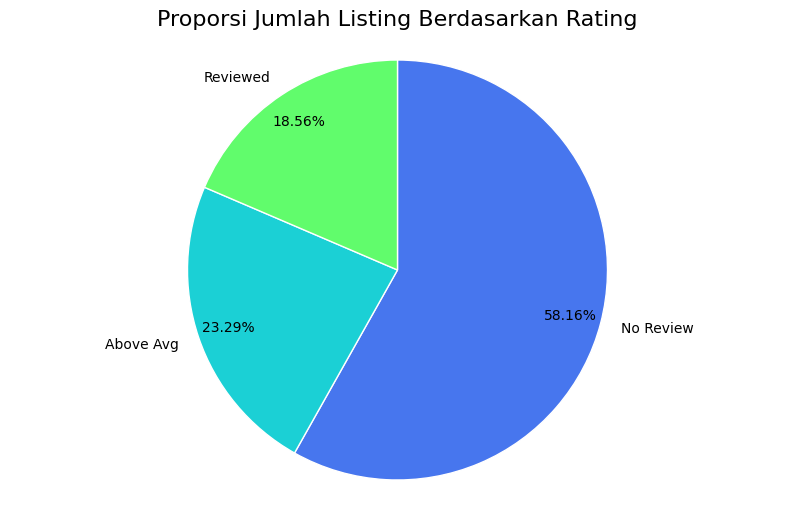

In [126]:
plt.rcParams["figure.figsize"] = (10,6)
plt.pie(df_rating['count'], labels=df_rating['rating'], autopct='%.2f%%', startangle=90,
        counterclock=False, pctdistance=0.85, wedgeprops=dict(edgecolor='white'), colors= sns.color_palette('turbo'))
plt.title('Proporsi Jumlah Listing Berdasarkan Rating', size=16, pad= 10)
plt.axis('equal')

plt.show()

Berdasarkan pie chart diatas, dapat dilihat bahwa proporsi jumlah listing yang memiliki rating No Review sebanyak 58.16%. Hal ini menunjukkan bahwa lebih dari 50% listing pada Airbnb Bangkok tidak ada yang berhasil disewakan.

## 2. Analisis Tipe Ruangan per Kategori Rating

Pada analisis ini kita akan menjawab beberapa pertanyaan:
1. Apakah ada tipe ruangan yang dominan di Bangkok
2. Apakah ada perbedaan untuk tipe ruangan antara listing yang berkategori Above Avg, Reviewed, dan No Review
3. Tipe ruangan mana yang memiliki paling banyak pengunjung selama 12 bulan terakhir
4. Tipe ruangan mana yang memiliki paling sedikit pengunjung selama 12 bulan terakhir

Pertama, mari kita cek proporsi tipe ruangan pada data kita

In [127]:
df_room_type = df['room_type'].value_counts().to_frame().reset_index()
df_room_type

,room_type,count
0,Entire home/apt,8912
1,Private room,5770
2,Hotel room,649
3,Shared room,523


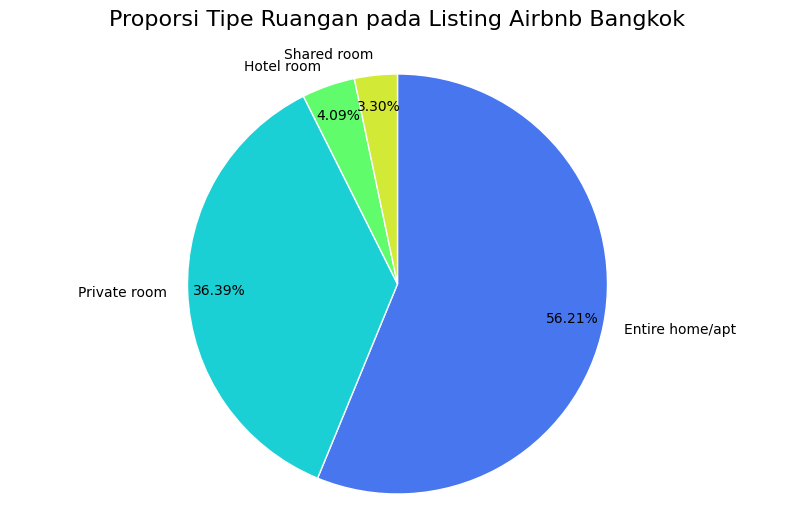

In [128]:
plt.rcParams["figure.figsize"] = (10,6)
plt.pie(df_room_type['count'], labels=df_room_type['room_type'], autopct='%.2f%%', startangle=90,
        counterclock=False, pctdistance=0.85, wedgeprops=dict(edgecolor='white'), colors=sns.color_palette('turbo'))
plt.title('Proporsi Tipe Ruangan pada Listing Airbnb Bangkok', size=16, pad= 20)
plt.axis('equal')

plt.show()

Berdasarkan pie chart diatas, tipe ruangan Entire home/apt memiliki jumlah proporsi yang cukup besar, yaitu 56.21%. Di sisi lain, tipe ruangan Hotel room dan Shared room keduanya memiliki proporsi yang sangat kecil yaitu diangka 4.09% dan 3.30%. Hal ini menunjukkan bahwa sebagian besar listing pada Airbnb mempunyai tipe ruangan Entire home/apt dan Private room.

In [129]:
df_room_rate = pd.crosstab(df['room_type'], df['rating'])
df_room_rate

rating,Above Avg,No Review,Reviewed
room_type,,,
Entire home/apt,2972,4027,1913
Hotel room,79,457,113
Private room,624,4288,858
Shared room,17,448,58


Mari kita cek apakah antara Room Type dan Rating ada keterkaitan.

In [130]:
stat, pvalue, dof, expected = chi2_contingency(df_room_rate)

if pvalue > 0.05:
    print(f'''
    pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa antara Rating dan Room Type ada keterkaitan (dependent)
    (Proporsinya TIDAK berbeda signifikan)
''')
else:
    print(f'''
    pvalue = {pvalue:.5f}. pvalue <= 0.05. Menolak Ho.
    Kita punya cukup bukti untuk mengatakan bahwa antara Rating dan Room Type ada keterkaitan (dependent)
    (Proporsinya berbeda signifikan)
''')


    pvalue = 0.00000. pvalue <= 0.05. Menolak Ho.
    Kita punya cukup bukti untuk mengatakan bahwa antara Rating dan Room Type ada keterkaitan (dependent)
    (Proporsinya berbeda signifikan)



Mengubah tabel menjadi bentuk proporsi

In [131]:
df_room_rate = df_room_rate.div(df_room_rate.sum(axis=1), axis=0)
df_room_rate

rating,Above Avg,No Review,Reviewed
room_type,,,
Entire home/apt,0.333483,0.451863,0.214654
Hotel room,0.121726,0.704160,0.174114
Private room,0.108146,0.743154,0.148700
Shared room,0.032505,0.856597,0.110899


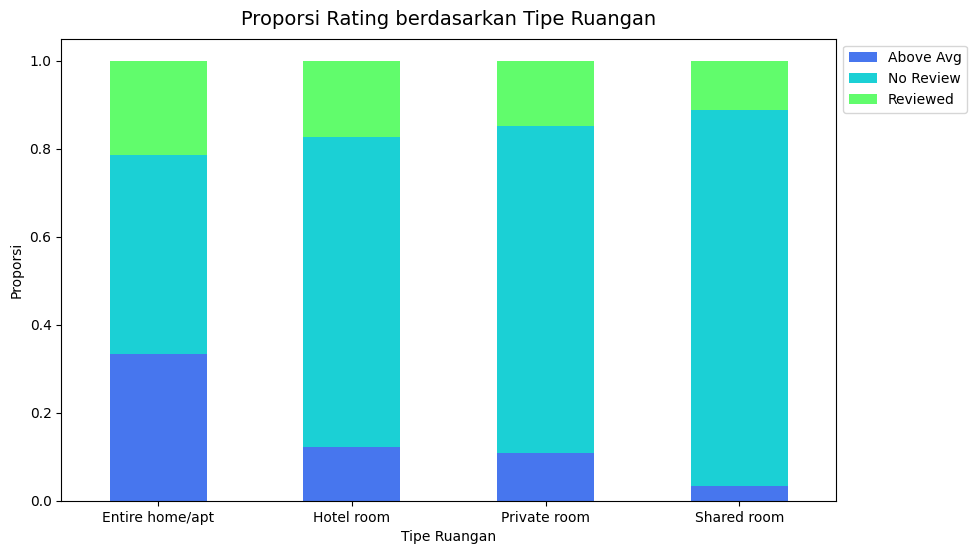

In [132]:
plt.rcParams["figure.figsize"] = (10,6)
ax = df_room_rate.plot(kind='bar', stacked=True, color= sns.color_palette('turbo'))
plt.xlabel('Tipe Ruangan')
plt.ylabel('Proporsi')
plt.title('Proporsi Rating berdasarkan Tipe Ruangan', size= 14, pad= 10)
plt.legend(bbox_to_anchor=(1, 1))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.show()

Berdasarkan grafik diatas, tipe ruangan Entire home/apt memiliki proporsi listing yang berkategori Above Avg paling besar yaitu 33.3%. Hal ini menunjukkan bahwa Entire home/apt adalah tipe ruangan yang paling populer selama 12 bulan terakhir disusul oleh ruangan yang bertipe Hotel room.

Di sisi lain, ruangan yang bertipe Shared room memiliki proporsi Above Avg yang paling kecil yaitu diangka 3%. Hal ini menunjukkan bahwa ruangan yang bertipe Shared room kurang diminati selama 12 bulan terakhir.

## 3. Analisis Harga per Kategori Rating

Pada analisis ini kita akan menjawab pertanyaan-pertanyaan berikut:
1. Apakah ada perbedaan harga antara listing yang berkategori Above Avg, Reviewed, dan No Review
2. Bagaimana harga berdasarkan tipe ruangan dan kategori rating

c:\Users\azkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\azkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\azkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


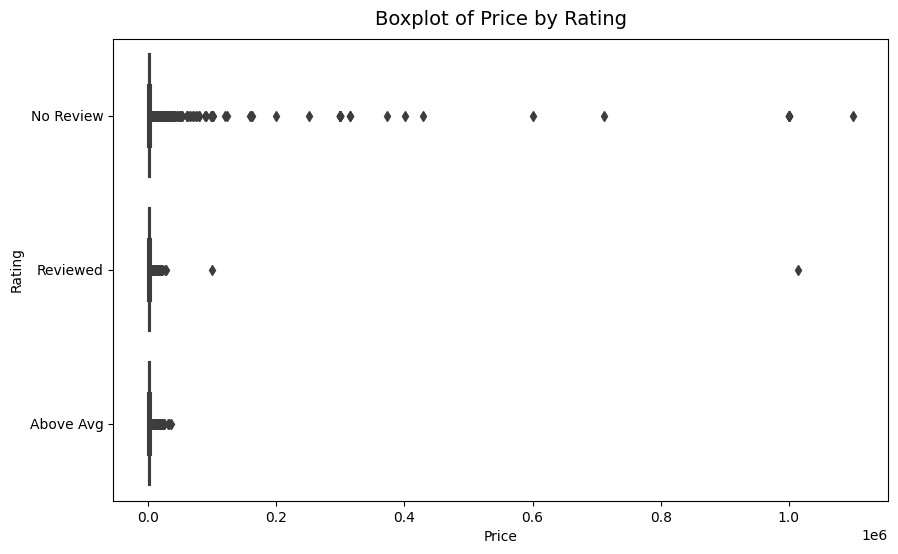

In [133]:
plt.figure(figsize = (10, 6))
plt.title('Boxplot of Price by Rating', size= 14, pad= 10)
sns.boxplot(data = df,x='price', y='rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

Berdasarkan boxplot diatas, data price memiliki banyak outlier. Maka kita dapat berasumsi bahwa persebaran data price tidak normal, sehingga kita akan menggunakan median untuk mengetahui harga untuk tiap kategori rating.

In [134]:
df_price = df.groupby('rating')[['price']].median().reset_index().sort_values('price', ascending=False)
df_price

,rating,price
0,Above Avg,1529.0
1,No Review,1400.0
2,Reviewed,1337.5


In [135]:
display(df[df['rating'] == 'Above Avg'][['price']].describe(), df[df['rating'] == 'Reviewed'][['price']].describe(), df[df['rating'] == 'No Review'][['price']].describe())

,price
count,3692.000000
mean,2148.577465
std,2287.916103
min,304.000000
25%,1000.000000
50%,1529.000000
75%,2426.000000
max,35000.000000


,price
count,2.942000e+03
mean,2.326339e+03
std,1.888137e+04
min,2.950000e+02
25%,8.907500e+02
50%,1.337500e+03
75%,2.099000e+03
max,1.014758e+06


,price
count,9.220000e+03
mean,3.930505e+03
std,3.090806e+04
min,2.780000e+02
25%,8.660000e+02
50%,1.400000e+03
75%,2.500000e+03
max,1.100000e+06


c:\Users\azkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\azkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\azkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


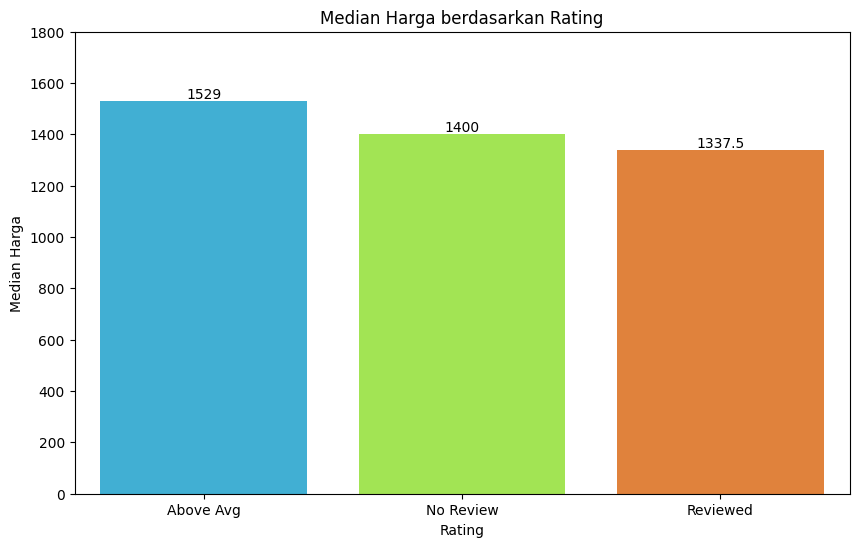

In [136]:
plt.figure(figsize= (10, 6))
plt.title('Median Harga berdasarkan Rating')
ax = sns.barplot(df_price, x= 'rating', y= 'price', palette= 'turbo')
ax.bar_label(ax.containers[0])
plt.xlabel('Rating')
plt.ylabel('Median Harga')
plt.yticks(range(0, 1801, 200))
plt.show()


In [137]:
from scipy.stats import kruskal

In [138]:
stat,pvalue = kruskal(
    df[df['rating']=='Above Avg']['price'],
    df[df['rating']=='Reviewed']['price'],
    df[df['rating']=='No Review']['price'],
)

pvalue

1.9512407573515853e-15

In [139]:
if pvalue > 0.05:
    print(f'''
    pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa minimal ada satu kelompok yang berbeda Median data pricenya.
    Tetapi kita tidak tahu yang mana.
    (Mediannya TIDAK berbeda signifikan)
    ''')
else:
    print(f'''
    pvalue = {pvalue:.5f}. pvalue <= 0.05. Menolak Ho.
    Kita punya cukup bukti untuk mengatakan bahwa minimal ada satu kelompok yang berbeda Median data pricenya.
    Tetapi kita tidak tahu yang mana.
    (Mediannya berbeda signifikan)
    ''')


    pvalue = 0.00000. pvalue <= 0.05. Menolak Ho.
    Kita punya cukup bukti untuk mengatakan bahwa minimal ada satu kelompok yang berbeda Median data pricenya.
    Tetapi kita tidak tahu yang mana.
    (Mediannya berbeda signifikan)
    


Pada barplot, listing yang berkategori Above Avg mempunyai median harga tertinggi. Namun jika kita lihat pada boxplot, listing yang berkategori No Review mempunyai banyak sekali outlier. Hal ini menunjukkan bahwa pada beberapa listing, mungkin saja mereka kurang diminati karena harganya yang sangat mahal.

In [140]:
df_rate_price = df.groupby(['rating', 'room_type'])[['price']].median().reset_index()
df_rate_price.head()

,rating,room_type,price
0,Above Avg,Entire home/apt,1628.5
1,Above Avg,Hotel room,1571.0
2,Above Avg,Private room,1000.0
3,Above Avg,Shared room,429.0
4,No Review,Entire home/apt,1500.0


c:\Users\azkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\azkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\azkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\azkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

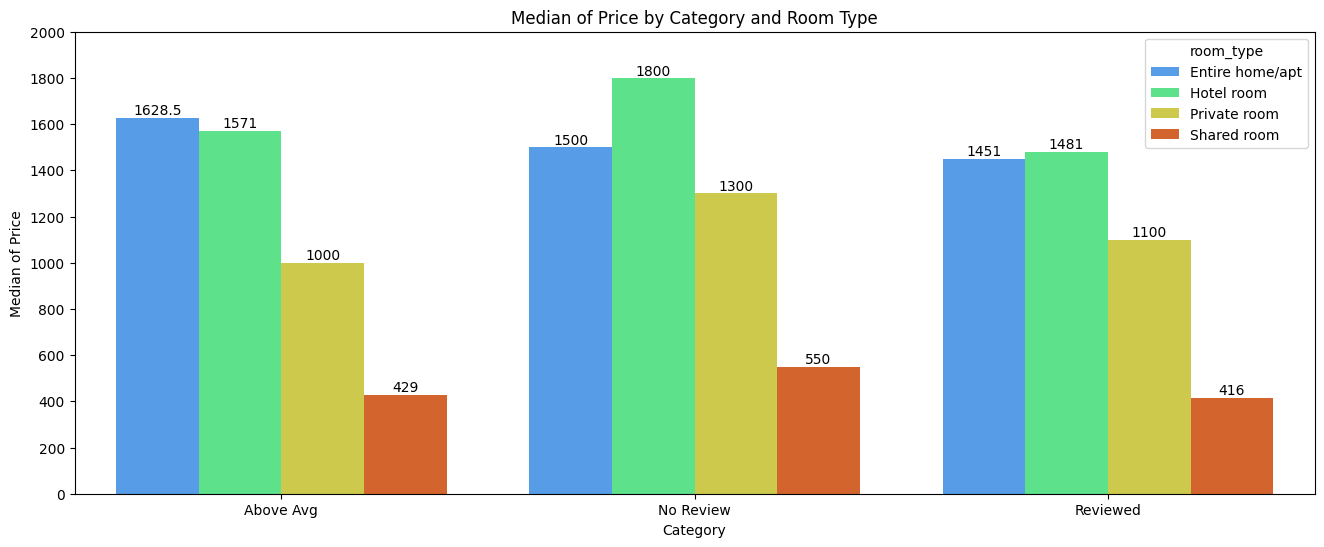

In [141]:
plt.figure(figsize= (16, 6))
plt.title('Median of Price by Category and Room Type')
ax = sns.barplot(df_rate_price, x= 'rating', y= 'price', hue= 'room_type', palette='turbo')
for i in range(4):
    ax.bar_label(ax.containers[i])
plt.yticks(range(0, 2001, 200))
plt.xlabel('Category')
plt.ylabel('Median of Price')
plt.show()

Berdasarkan gambar diatas, median harga tidak dapat menggambarkan kepopuleran suatu listing. 

## 4. Analisis Neighbourhood per Kategori Rating

Pada analisis ini kita akan menjawab pertanyaan-pertanyaan berikut:
1. Apakah ada keterkaitan antara daerah dengan jumlah review (kategori rating)
2. Daerah apa yang memiliki paling banyak pengunjung selama 12 bulan terakhir
3. Daerah apa yang memiliki pengunjung paling sedikit selama 12 bulan terakhir

In [142]:
df_nb_rate = pd.crosstab(df['neighbourhood'], df['rating'])
df_nb_rate.head()

rating,Above Avg,No Review,Reviewed
neighbourhood,,,
Bang Bon,0,5,0
Bang Kapi,31,192,37
Bang Khae,3,75,14
Bang Khen,15,89,12
Bang Kho laen,15,93,32


In [143]:
stat, pvalue, dof, expected = chi2_contingency(df_nb_rate)

if pvalue > 0.05:
    print(f'''
    pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa antara Rating dan Neighbourhood ada keterkaitan (dependent)
    (Proporsinya TIDAK berbeda signifikan)
''')
else:
    print(f'''
    pvalue = {pvalue:.5f}. pvalue <= 0.05. Menolak Ho.
    Kita punya cukup bukti untuk mengatakan bahwa antara Rating dan Neighbourhood ada keterkaitan (dependent)
    (Proporsinya berbeda signifikan)
''')


    pvalue = 0.00000. pvalue <= 0.05. Menolak Ho.
    Kita punya cukup bukti untuk mengatakan bahwa antara Rating dan Neighbourhood ada keterkaitan (dependent)
    (Proporsinya berbeda signifikan)



In [144]:
df_nb_rate = df_nb_rate.div(df_nb_rate.sum(axis=1), axis=0)
df_nb_rate.head()

rating,Above Avg,No Review,Reviewed
neighbourhood,,,
Bang Bon,0.000000,1.000000,0.000000
Bang Kapi,0.119231,0.738462,0.142308
Bang Khae,0.032609,0.815217,0.152174
Bang Khen,0.129310,0.767241,0.103448
Bang Kho laen,0.107143,0.664286,0.228571


### 1. Top 5 Daerah

In [145]:
top5nb = df_nb_rate.sort_values('Above Avg', ascending=False).head()
top5nb

rating,Above Avg,No Review,Reviewed
neighbourhood,,,
Khlong Toei,0.401526,0.390558,0.207916
Sathon,0.331273,0.462299,0.206428
Vadhana,0.304691,0.501626,0.193683
Pom Prap Sattru Phai,0.276423,0.569106,0.154472
Ratchathewi,0.249551,0.528725,0.221724


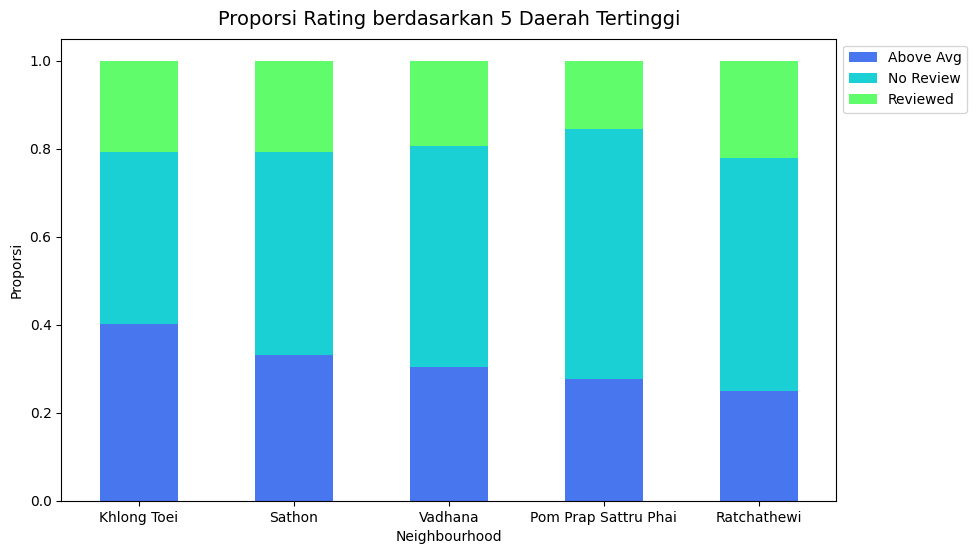

In [146]:
plt.rcParams["figure.figsize"] = (10,6)
ax = top5nb.plot(kind='bar', stacked=True, color= sns.color_palette('turbo'))
plt.xlabel('Neighbourhood')
plt.ylabel('Proporsi')
plt.title('Proporsi Rating berdasarkan 5 Daerah Tertinggi', size= 14, pad= 10)
plt.legend(bbox_to_anchor=(1, 1))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.show()

- Khlong Toei : Distrik ini terletak di bagian tengah kota dan dikenal sebagai area perkotaan yang padat penduduk. Salah satu ciri khas Khlong Toei adalah Terminal Pesiar Internasional Laem Chanbang yang terletak di sepanjang Sungai Chao Phraya.
- Sathon :  Daerah ini mencakup bisnis, hiburan, dan tempat-tempat rekreasi, sehingga merupakan salah satu distrik yang beragam dan vital di Bangkok.
- Vadhana : Distrik yang cukup beragam, dengan campuran antara pusat perbelanjaan, taman, tempat-tempat makan, dan kehidupan kota yang sibuk.
- Pom Prap Sattru Phai : Distrik yang kaya sejarah dan memiliki daya tarik wisata yang cukup penting di Bangkok. Tempat-tempat tersebut mencerminkan warisan budaya dan sejarah Thailand.
- Ratchathewi : Daerah yang ramai dengan kegiatan perbelanjaan dan memiliki akses yang baik ke beberapa pusat perbelanjaan terkenal di Bangkok. Distrik ini merupakan destinasi populer bagi wisatawan yang mencari pengalaman belanja yang beragam.

### 2. Bottom 5 Daerah

In [147]:
bot5nb = df_nb_rate.sort_values('No Review', ascending=False).head()
bot5nb

rating,Above Avg,No Review,Reviewed
neighbourhood,,,
Bang Bon,0.0000,1.0000,0.0
Thung khru,0.0000,1.0000,0.0
Nong Khaem,0.0000,1.0000,0.0
Nong Chok,0.0000,1.0000,0.0
Khlong Sam Wa,0.0625,0.9375,0.0


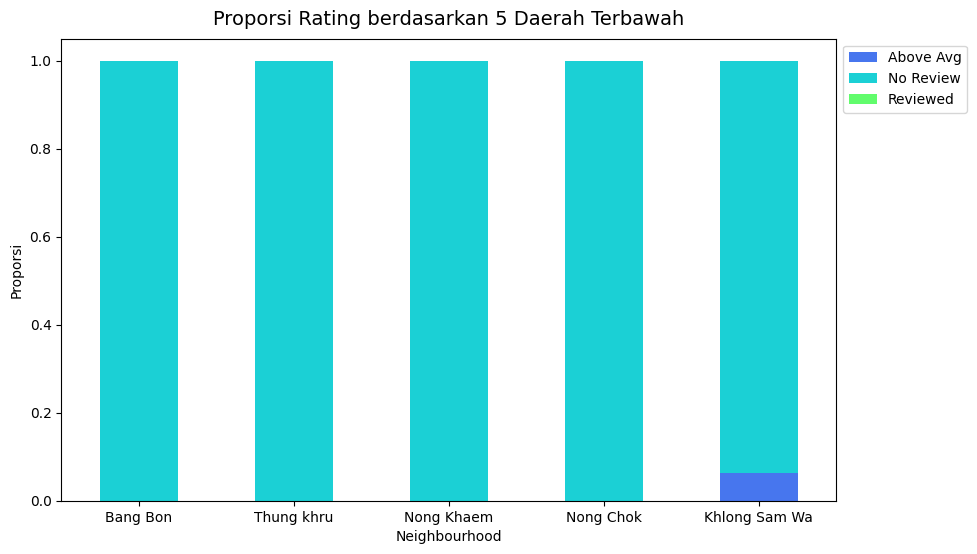

In [148]:
plt.rcParams["figure.figsize"] = (10,6)
ax = bot5nb.plot(kind='bar', stacked=True, color= sns.color_palette('turbo'))
plt.xlabel('Neighbourhood')
plt.ylabel('Proporsi')
plt.title('Proporsi Rating berdasarkan 5 Daerah Terbawah', size= 14, pad= 10)
plt.legend(bbox_to_anchor=(1, 1))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.show()

- Bang Bon : Bang Bon adalah distrik yang lebih subur dan tenang dibandingkan dengan pusat kota, dan menawarkan pengalaman yang lebih autentik dari kehidupan sehari-hari masyarakat Bangkok.

- Thung khru : Thung Khru adalah distrik yang relatif tenang dan lebih fokus pada kehidupan lokal sehari-hari daripada beberapa area yang lebih padat di pusat kota Bangkok. Sebagian besar wilayah Thung Khru merupakan daerah perumahan.

- Nong Khaem : Nong Khaem adalah distrik yang relatif tenang dengan suasana pedesaan dan perumahan. 

- Nong Chok : Nong Chok adalah salah satu distrik di bagian timur laut Bangkok, Thailand. Sebagai daerah yang terletak agak jauh dari pusat kota, Nong Chok memiliki karakteristik yang lebih pedesaan dan ruang terbuka daripada beberapa distrik di pusat kota.

- Khlong Sam Wa : Khlong Sam Wa adalah salah satu distrik di Bangkok, Thailand, yang terletak di sebelah timur laut pusat kota. Distrik ini memiliki karakteristik yang beragam, mencakup area perkotaan dan pedesaan. 

### 3. Visualisasi 10 daerah diatas pada peta

In [149]:
list_top5nb = ['Khlong Toei', 'Sathon', 'Vadhana', 'Pom Prap Sattru Phai', 'Ratchathewi']
list_top5location = [[13.7083, 100.5833], [13.7069, 100.5267], [13.7194, 100.5700], [13.7515, 100.5168], [13.7512, 100.5300]]

list_bot5nb = ['Bang Bon', 'Thung khru', 'Nong Khaem', 'Nong Chok', 'Khlong Sam Wa']
list_bot5location = [[13.6594, 100.3993], [13.6472, 100.4951], [13.6523, 100.4143], [13.8555, 100.8582], [13.8591, 100.7040]]

In [156]:
mapBangkok = folium.Map(
    location= [13.736717, 100.523186],
    tiles='cartodbpositron',
    min_zoom= 10,
    max_zoom= 11,
)

for i in range(5):
    nbpin = folium.Marker(
        location= list_top5location[i],
        tooltip= list_top5nb[i],
        icon= folium.Icon(
            color = 'blue',
        )
    ).add_to(mapBangkok)

for i in range(5):
    nbpin = folium.Marker(
        location= list_bot5location[i],
        tooltip= list_bot5nb[i],
        icon= folium.Icon(
            color = 'red',
        )
    ).add_to(mapBangkok)

mapBangkok

Keterangan gambar peta:
- Biru : Top 5 Distrik
- Merah : Bottom 5 Distrik
<br><br>

Dilihat pada peta diatas, daerah-daerah yang populer (mempunyai jumlah review tinggi) adalah daerah yang berlokasi di pusat kota Bangkok. Sedangkan daerah-daerah yang tidak populer adalah daerah yang berlokasi di pinggiran kota / jauh dari pusat kota Bangkok.

# Kesimpulan dan Rekomendasi

### Kesimpulan

Dari analisis yang telah dilakukan, kita bisa membuat kesimpulan sebagai berikut:
- Listing yang memiliki review diatas rata-rata sebanyak 3,692 dari 15,854 memiliki karakteristik sebagai berikut: 
    - Sebagian besar adalah ruangan yang bertipe Entire home/apt. 
    - 75% Listing pada kategori ini mempunyai harga berkisar diantara 304 - 2426 bath. Memang ada beberapa listing yang memiliki harga cukup tinggi sampai di angka 35,000 bath. Namun listing tersebut memiliki review diatas rata-rata yang menunjukkan bahwa harga tersebut sebanding dengan fasilitas yang ditawarkan.
    - 5 Daerah yang paling populer selama 12 bulan terakhir adalah Khlong Toei, Sathon, Vadhana, Pom Prap Sattru Phai, Ratchathewi. Daerah tersebut berlokasi di pusat kota Bangkok.
<br><br>
- Lebih dari 50% dari total listing tidak memiliki review yaitu sebanyak 9220 listing. Berikut adalah karakteristiknya:
    - Sebagian besar dari listing yang bertipe ruangan Shared room (85%) tidak memiliki review. Hal ini menunjukkan bahwa tipe ruangan Shared room tidak banyak diminati oleh guest yang ingin berkunjung ke Bangkok. Proporsi kategori ini pada ruangan yang bertipe Private room dan Hotel room juga cukup tinggi (> 70%) namun tidak sebanyak ruangan yang bertipe Shared room.
    - Terdapat beberapa listing yang memiliki harga sangat tinggi. Hal ini mungkin menyebabkan listing tersebut tidak laku (tidak ada yang menyewa).
    - Terdapat 4 Daerah yang tidak memiliki review sama sekali yaitu Bang Bon, Thung khru, Nong Khaem, Nong Chok. Daerah tersebut berlokasi di pinggiran kota Bangkok.


### Rekomendasi

1. Untuk menarik lebih banyak pelanggan, listing-listing yang mempunyai jumlah review diatas rata-rata dapat ditampilkan pada home page Airbnb. Hal ini mungkin dapat meningkatkan jumlah pelanggan yang akan menyewa penginapan di Airbnb.

2. Airbnb dapat merekrut lebih banyak host yang menyewakan tempat menginap pada daerah-daerah Bangkok yang memiliki banyak tempat wisata dan berlokasi di pusat kota Bangkok. Karena sebagian besar orang yang bepergian ke Bangkok bertujuan untuk berlibur dan menikmati lokasi-lokasi wisata disana.

3. Airbnb dapat memberikan rekomendasi harga pada host baru yang ingin menyewakan propertinya agar harganya sesuai dan tidak terlalu tinggi. Hal ini dapat meningkatkan jumlah penyewa, karena ada beberapa listing yang tidak laku dikarenakan harganya yang sangat tinggi.

4. Memperbanyak perekrutan pada host-host yang ingin menyewakan properti yang mempunyai tipe ruangan Entire room/apt.

Dengan melakukan hal-hal diatas, diharapkan analisis ini bisa membantu pihak Airbnb untuk memperluas jangkauan dan merekrut host-host yang berada di daerah-daerah populer, menyesuaikan harga sewa dari properti dengan fasilitas yang ditawarkan, dan meningkatkan jumlah penyewa.